In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [19]:
raw_data = pd.read_csv('./dataset.csv', header=0)

In [20]:
raw_data = raw_data[-300:]

In [21]:
raw_data.isnull().values.any()

False

In [22]:
headers = list(raw_data)

In [23]:
n = raw_data.shape[0]

In [24]:
window = raw_data[-300:]

In [25]:
ret = window.iloc[-1]/window.iloc[0]

In [26]:
ret

A005930    1.273973
A000660    1.338549
A005380    1.061674
A006400    0.969199
A012330    1.343832
             ...   
A004920    0.755776
A008500    1.130435
A025890    0.961637
A005030    0.831560
A019490    0.792240
Length: 488, dtype: float64

In [27]:
normalized_raw_data = (raw_data - raw_data.min())/(raw_data.max() - raw_data.min())

In [28]:
a = normalized_raw_data.std()

In [29]:
a

A005930    0.204376
A000660    0.195609
A005380    0.192818
A006400    0.217902
A012330    0.230367
             ...   
A004920    0.209455
A008500    0.176487
A025890    0.211827
A005030    0.208868
A019490    0.184723
Length: 488, dtype: float64

In [31]:
xy = pd.DataFrame()

In [32]:
xy['std'] = a

In [33]:
xy['ret']= ret

In [34]:
xy

,std,ret
A005930,0.204376,1.273973
A000660,0.195609,1.338549
A005380,0.192818,1.061674
A006400,0.217902,0.969199
A012330,0.230367,1.343832
...,...,...
A004920,0.209455,0.755776
A008500,0.176487,1.130435
A025890,0.211827,0.961637
A005030,0.208868,0.831560


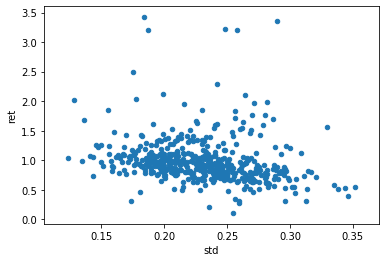

In [149]:
xy.plot.scatter(x = 'std', y = 'ret')

In [3]:
import sklearn as sk

In [158]:
X = xy
from sklearn.cluster import KMeans

In [162]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)


In [166]:
X = np.asarray(xy)

In [167]:
X

array([[0.20437616, 1.2739726 ],
       [0.1956092 , 1.33854908],
       [0.19281824, 1.06167401],
       [0.21790174, 0.96919918],
       [0.23036744, 1.34383202],
       [0.23236975, 0.89077213],
       [0.24527952, 0.88640596],
       [0.27596894, 1.4244373 ],
       [0.29272462, 1.10978044],
       [0.26200143, 1.54582075],
       [0.21905579, 1.31470231],
       [0.19856753, 1.125     ],
       [0.19705843, 0.95131846],
       [0.2035637 , 0.94339623],
       [0.27545619, 0.8870674 ],
       [0.19406049, 0.74453125],
       [0.19646824, 0.95833333],
       [0.17564223, 1.09536082],
       [0.23703477, 0.84210526],
       [0.21041841, 1.15940224],
       [0.24509566, 0.92943201],
       [0.24056962, 0.82798834],
       [0.27578342, 0.816609  ],
       [0.20847924, 0.95299145],
       [0.22177031, 1.10965006],
       [0.20437755, 1.0694051 ],
       [0.24737033, 0.77614679],
       [0.21469182, 0.98376184],
       [0.27531061, 0.63407258],
       [0.20903221, 1.08482676],
       [0.

/Users/yongcheolkim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yongcheolkim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yongcheolkim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yongcheolkim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yongcheolkim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yongcheolkim/opt/anacon

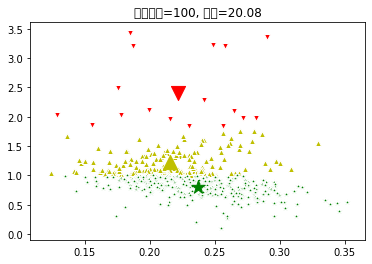

In [180]:
def plot_KMeans(n):
    model = KMeans(n_clusters=3, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='w')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='w')
    plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], marker='*', facecolor='g', edgecolors='w')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.scatter(c2[0], c2[1], marker='*', c="g", s=200)
    plt.grid(False)
    plt.title("반복횟수={}, 관성={:5.2f}".format(n, -model.score(X)))

plt.figure()
plot_KMeans(100)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(min_samples=6)


In [15]:
labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [45]:
import pandas as pd
import sklearn.datasets as datasets
iris = sk.datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)




feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]




from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(xy))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([xy,predict],axis=1)





In [70]:
pd.set_option('display.max_rows', -1)

In [80]:
xy['predict'] = predict

In [95]:
xy['predict'].iloc[76] = -1

Text(0.5, 0, 'Petal length')

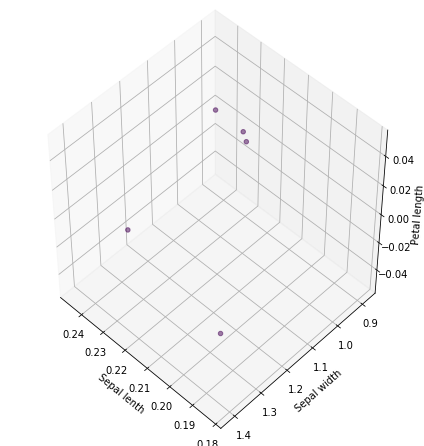

In [96]:


from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(xy['std'],xy['ret'],c=xy['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')




In [84]:
plt.show()

In [89]:
a.max()

std    189497.971827
ret         3.426652
dtype: float64

In [93]:
normalized_raw_data

,A005930,A000660,A005380,A006400,A012330,A005490,A017670,A000270,A015760,A035720,...,A012600,A015260,A001770,A000950,A002420,A004920,A008500,A025890,A005030,A019490
4395,0.329870,0.328982,0.408284,0.779817,0.235,0.760736,0.637931,0.211340,0.031532,0.167382,...,0.200000,0.648438,0.124498,0.938053,0.701299,0.885845,0.109589,0.520231,0.441509,0.572308
4396,0.319481,0.313316,0.467456,0.779817,0.245,0.766871,0.629310,0.221649,0.022523,0.184549,...,0.187179,0.671875,0.140562,0.982301,0.675325,0.972603,0.198630,0.566474,0.494340,0.532308
4397,0.348052,0.331593,0.506903,0.908257,0.315,0.834356,0.732759,0.195876,0.072072,0.184549,...,0.178205,0.722656,0.168675,1.000000,0.654545,1.000000,0.198630,0.618497,0.516981,0.566154
4398,0.342857,0.287206,0.457594,0.944954,0.240,0.742331,0.827586,0.139175,0.130631,0.184549,...,0.174359,0.718750,0.172691,0.920354,0.644156,0.963470,0.219178,0.606936,0.505660,0.556923
4399,0.335065,0.342037,0.447732,0.944954,0.260,0.815951,0.879310,0.123711,0.198198,0.191702,...,0.191026,0.703125,0.172691,0.955752,0.680519,0.936073,0.315068,0.641618,0.535849,0.606154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,0.937662,0.963446,0.585799,0.495413,0.930,0.490798,0.215517,0.914948,0.288288,0.871245,...,0.083333,0.027344,0.176707,0.247788,0.161039,0.095890,0.383562,0.497110,0.030189,0.000000
4691,0.911688,0.942559,0.575937,0.440367,0.905,0.447853,0.189655,0.912371,0.288288,0.842632,...,0.057692,0.007812,0.164659,0.132743,0.161039,0.105023,0.383562,0.473988,0.037736,0.009231
4692,0.932468,0.968668,0.585799,0.394495,0.940,0.484663,0.224138,0.932990,0.265766,0.864092,...,0.051282,0.019531,0.188755,0.159292,0.124675,0.200913,0.376712,0.468208,0.109434,0.027692
4693,0.989610,1.000000,0.546351,0.587156,0.905,0.429448,0.103448,0.894330,0.274775,0.942775,...,0.066667,0.015625,0.208835,0.168142,0.132468,0.200913,0.390411,0.485549,0.094340,0.061538


In [124]:
normalized_raw_data.iloc[0].values

array([0.32987013, 0.32898172, 0.40828402, 0.77981651, 0.235     ,
       0.7607362 , 0.63793103, 0.21134021, 0.03153153, 0.16738197,
       0.0477707 , 0.20809249, 0.30573248, 0.88051471, 0.640625  ,
       0.88826816, 0.75296443, 0.11790393, 0.46280992, 0.50882353,
       0.5483871 , 0.825     , 0.75      , 0.63815789, 0.64167386,
       0.36458333, 0.59923664, 0.33548387, 0.90186916, 0.31208791,
       0.97058824, 0.0625    , 0.35833333, 0.79591837, 0.12830189,
       0.09836066, 0.90423573, 1.        , 0.37288287, 0.14117647,
       0.14377682, 0.53012048, 0.33413174, 0.56222816, 0.19337017,
       0.36069114, 0.23510972, 0.94202899, 0.78358112, 0.1004902 ,
       0.38592233, 0.46045198, 0.54603113, 0.81860465, 0.56934307,
       0.09433962, 0.5620438 , 0.05750799, 0.61682243, 0.45189003,
       0.40555556, 0.50240385, 0.05933118, 0.13567839, 0.7311828 ,
       0.9047619 , 0.78369384, 0.94174757, 0.27089337, 0.1961326 ,
       0.86956522, 0.04790419, 0.37931034, 1.        , 0.48051

In [96]:
b = pd.DataFrame((normalized_raw_data.iloc[-1]/normalized_raw_data.iloc[0], normalized_raw_data.std()))

In [122]:
(normalized_raw_data.iloc[-1]/normalized_raw_data.iloc[0]).values

array([2.88976378e+00, 2.88888889e+00, 1.33816425e+00, 8.23529412e-01,
       3.78723404e+00, 5.32258065e-01, 1.75675676e-01, 4.21951220e+00,
       8.85714286e+00, 5.63247863e+00, 1.82666667e+01, 3.27777778e+00,
       0.00000000e+00, 8.43423800e-01, 4.95934959e-01, 3.14465409e-01,
       8.55643045e-01, 3.74074074e+00, 2.50000000e-01, 1.73988439e+00,
       1.96078431e-01, 4.04040404e-01, 1.85185185e-02, 7.16494845e-01,
       1.35457977e+00, 1.70000000e+00, 2.22929936e-01, 8.84615385e-01,
       5.95854922e-02, 1.50000000e+00, 3.46590909e-01, 4.08333333e+00,
       1.13953488e+00, 1.07692308e+00, 7.20588235e+00, 2.83333333e+00,
       2.13849287e-01, 3.40632603e-02, 2.21140073e+00, 2.95833333e+00,
       2.32835821e+00, 1.09848485e+00, 2.99283154e+00, 6.24583875e-01,
       1.85714286e+00, 1.19161677e+00, 1.78666667e+00, 6.92307692e-02,
       7.08718205e-02, 9.75609756e-01, 2.59119497e+00, 5.46012270e-01,
       3.43019483e-01, 2.21590909e-01, 1.79487179e-01, 2.66666667e-01,
      

In [98]:
b = b.T

In [99]:
b

,0,1
A005930,2.889764,0.204376
A000660,2.888889,0.195609
A005380,1.338164,0.192818
A006400,0.823529,0.217902
A012330,3.787234,0.230367
...,...,...
A004920,0.237113,0.209455
A008500,3.625000,0.176487
A025890,0.833333,0.211827
A005030,0.188034,0.208868


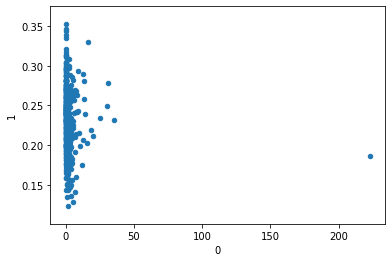

In [101]:
b.plot.scatter(x=0,y=1)

In [104]:
b[0].max()

inf

In [102]:
b.max()

0         inf
1    0.351999
dtype: float64

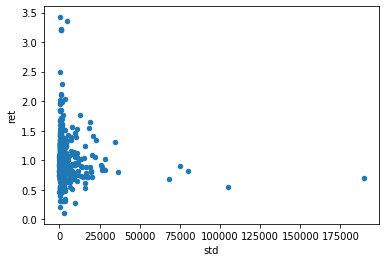

In [88]:
a.plot.scatter(x='std', y = 'ret')